# Leitura dados IPEADATA e Banco Central

## Monica Barros - 25/02/2021 - atualização em 21/05/2021

In [1]:
# para baixar os dados do ipeadata
#====================================================
#https://github.com/luanborelli/ipeadatapy
#!pip install ipeadatapy
!pip install --upgrade ipeadatapy
import ipeadatapy as idpy

* ### Tive que usar o Quandl para baixar os dados - o módulo sgs não funcionava por causa do locale
* ### Também não funcionou ao tentar fazer a request direto e ler o json (às vezes ia, às vezes não ia)

In [121]:
# Alternativa para baixar os dados do Banco Central
#====================================================
!pip install quandl
import quandl
quandl.ApiConfig.api_key = '***** Obtenha sua própria chave de acesso *****'   

In [3]:
# para baixar os dados diretamente do Banco Central
#===================================================
!pip install sgs
import sgs

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')
pd.set_option('max_colwidth', 200)  # Altera largura máxima das colunas
pd.set_option('display.max_colwidth', None)

import seaborn as sns; 
sns.set(rc={'figure.figsize':(17,6)})

plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

import os
import datetime
from dateutil.relativedelta import relativedelta
import time
from time import perf_counter

import glob
import pickle

#!pip install openpyxl
from openpyxl import Workbook

#!pip install pytz
import pytz
local_tz = pytz.timezone('America/Sao_Paulo')

In [5]:
import urllib3
import json
import urllib.request

from pandas.io.json import json_normalize

In [6]:
path_result = '/home/jovyan/work/@Fund_Eval/@fatores_risco/'
os.makedirs(path_result, exist_ok = 'TRUE')

path_data = '/home/jovyan/work/@Fund_Eval/@dados_acoes/'
os.makedirs(path_data, exist_ok = 'TRUE')

path_code = '/home/jovyan/work/@Fund_Eval/PROGRAMAS/'
os.makedirs(path_code, exist_ok = 'TRUE')

In [7]:
def restringe_periodo(serie, ano_inicio):
    import time
    import random
    result = (idpy.timeseries(serie))
    print("*** A série buscada no IPEADATA é: ", serie)
    if 'YEAR' in result:
        result = result.loc[result['YEAR'] >= ano_inicio]  # em outras séries a coluna é 'ANO'
    if 'ANO'  in result:
        result = result.loc[result['ANO'] >= ano_inicio]
    time.sleep(random.uniform(0.5,3))  
    # insere delay aleatório entre 0.5 e 3 segundos para tentar evitar problemas com o servidor
    # Se não dá o erro: ConnectionError: 
    # ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
    return result

## Selecionando séries diárias no IPEADATA

- ANBIMA366_TJTLN são as taxas de juros pré de 1, 3, 6 e 12 meses
- BMF_366FUTXDOL = dolar futuro 1 e 3 meses
- BMF366_FUT3DOLV366 = volatilidade do dólar futuro, Calculada pelo Ipeadata com base nas taxas diárias de retorno entre as cotações de fechamento observadas nos 21 últimos dias de negociação
- GM366_ERC366 = Taxa de câmbio R /𝑈𝑆  comercial (valor de compra)
- GM366_ERTUR366 = Taxa de câmbio - R /𝑈𝑆  - turismo - venda - média
- GM366_ERV366 = Taxa de câmbio - R /𝑈𝑆  - comercial - venda - média
- GM366_ERVV366	= Taxa de câmbio - R /𝑈𝑆  - comercial - venda - média - volatilidade
- GM366_EUROV366 = Zona do Euro - taxa de câmbio - R$ / euro - venda - média
- EIA366_PBRENT366	www.eia.doe.gov	Preço - pétroleo bruto - Brent (FOB)
- EIA366_PWTI366	www.eia.doe.gov	Preço - pétroleo bruto - WTI (FOB)
- GM366_DOW366	www.valor.com.br	Índice de ações - Dow Jones - fechamento
- SGS366_NASDAQ366	www.nasdaq.com	Índice de ações - NASDAQ - fechamento
- VALOR366_FEDFUND366	www.valor.com.br	Taxa de juros básica - Federal Funds - fixada pelo FOMC
- GM366_IBVSP366	www.bmfbovespa.com.br	Índice de ações - Ibovespa - fechamento
- GM366_IBVSPV366	www.ipea.gov.br	Índice de ações - Ibovespa - fechamento - volatilidade


In [8]:
series_eco = ['ANBIMA366_TJTLN1366', 'ANBIMA366_TJTLN3366', 'ANBIMA366_TJTLN6366', 'ANBIMA366_TJTLN12366', 
             'BMF366_FUT1DOL366', 'BMF366_FUT3DOL366', 'BMF366_FUT3DOLV366', 
             'GM366_ERTUR366', 'GM366_ERV366', 'GM366_ERVV366', 'GM366_EUROV366', 
              'EIA366_PBRENT366', 'EIA366_PWTI366', 'GM366_DOW366', 'SGS366_NASDAQ366', 'VALOR366_FEDFUND366',
              'GM366_IBVSP366', 'GM366_IBVSPV366']

In [9]:
len(series_eco)

18

### Capturando os dados através do Ipeadata

### Dividi a consulta em pedaços - está dando time out 

In [10]:
time_start = time.time()
time_start;

#df1 = [restringe_periodo(serie, 2017) for serie in series_eco] 

df_pt1 = [restringe_periodo(serie, 2017) for serie in series_eco[0:4]] 
time_end = time.time();
elapsed_time1 = time_end - time_start;
print('Demorou:',round(elapsed_time1,2),' segundos')

*** A série buscada no IPEADATA é:  ANBIMA366_TJTLN1366
*** A série buscada no IPEADATA é:  ANBIMA366_TJTLN3366
*** A série buscada no IPEADATA é:  ANBIMA366_TJTLN6366
*** A série buscada no IPEADATA é:  ANBIMA366_TJTLN12366
Demorou: 17.81  segundos


In [11]:
df_pt2 = [restringe_periodo(serie, 2017) for serie in series_eco[4:9]] 
time.sleep(1)
time_end = time.time();
elapsed_time2 = time_end - time_start;
print('Demorou:',round(elapsed_time2,2),' segundos')

*** A série buscada no IPEADATA é:  BMF366_FUT1DOL366
*** A série buscada no IPEADATA é:  BMF366_FUT3DOL366
*** A série buscada no IPEADATA é:  BMF366_FUT3DOLV366
*** A série buscada no IPEADATA é:  GM366_ERTUR366
*** A série buscada no IPEADATA é:  GM366_ERV366
Demorou: 34.1  segundos


In [12]:
df_pt3 = [restringe_periodo(serie, 2017) for serie in series_eco[9:14]] 
time.sleep(1)
time_end = time.time();
elapsed_time3 = time_end - time_start;
print('Demorou:',round(elapsed_time3,2),' segundos')

*** A série buscada no IPEADATA é:  GM366_ERVV366
*** A série buscada no IPEADATA é:  GM366_EUROV366
*** A série buscada no IPEADATA é:  EIA366_PBRENT366
*** A série buscada no IPEADATA é:  EIA366_PWTI366
*** A série buscada no IPEADATA é:  GM366_DOW366
Demorou: 54.65  segundos


In [15]:
df_pt4 = [restringe_periodo(serie, 2017) for serie in series_eco[14:len(series_eco) + 1]] 
time_end = time.time();
elapsed_time4 = time_end - time_start;
print('Demorou:',round(elapsed_time4,2),' segundos')

*** A série buscada no IPEADATA é:  SGS366_NASDAQ366
*** A série buscada no IPEADATA é:  VALOR366_FEDFUND366
*** A série buscada no IPEADATA é:  GM366_IBVSP366
*** A série buscada no IPEADATA é:  GM366_IBVSPV366
Demorou: 359.81  segundos


In [16]:
# Concatena os diversos pedaços
xx1 = pd.concat([df_pt1[i] for i in range(4)])
ncol = xx1.shape[1]
ncol
xx1['VALUE'] = xx1.iloc[:,ncol - 1].fillna(0) # + xx1.iloc[:,ncol - 2].fillna(0) 
#display(xx1.head(3))

xx2 = pd.concat([df_pt2[i] for i in range(5)]) 
ncol = xx2.shape[1]
ncol
xx2['VALUE'] = xx2.iloc[:,ncol - 2].fillna(0) + xx2.iloc[:,ncol - 1].fillna(0)
#display(xx2.head(3))

xx3 = pd.concat([df_pt3[i] for i in range(5)]) 
ncol = xx3.shape[1]
ncol
xx3['VALUE'] = xx3.iloc[:,ncol - 3].fillna(0) + xx3.iloc[:,ncol - 2].fillna(0) + xx3.iloc[:,ncol - 1].fillna(0)
#display(xx3.head(3))

xx4 = pd.concat([df_pt4[i] for i in range(4)]) 
ncol = xx4.shape[1]
ncol
xx4['VALUE'] = xx4.iloc[:,ncol - 2].fillna(0) + xx4.iloc[:,ncol - 1].fillna(0)
#display(xx4.head(3))

# Seleciona apenas as colunas que interessam
xx1 = xx1[['CODE','YEAR', 'MONTH', 'VALUE']]
xx2 = xx2[['CODE','YEAR', 'MONTH', 'VALUE']]
xx3 = xx3[['CODE','YEAR', 'MONTH', 'VALUE']]
xx4 = xx4[['CODE','YEAR', 'MONTH', 'VALUE']]

xx_all = pd.concat([xx1, xx2, xx3, xx4])
print(xx_all.shape)
display(xx_all.head(3))
display(xx_all.tail(3))


(21849, 4)


,CODE,YEAR,MONTH,VALUE
DATE,,,,
2017-01-01,ANBIMA366_TJTLN1366,2017,1,13.3029
2017-01-02,ANBIMA366_TJTLN1366,2017,1,13.2233
2017-01-03,ANBIMA366_TJTLN1366,2017,1,13.0480


,CODE,YEAR,MONTH,VALUE
DATE,,,,
2021-05-13,GM366_IBVSPV366,2021,5,1.075285
2021-05-14,GM366_IBVSPV366,2021,5,1.080581
2021-05-17,GM366_IBVSPV366,2021,5,1.093305


In [18]:
xx_all

,CODE,YEAR,MONTH,VALUE
DATE,,,,
2017-01-01,ANBIMA366_TJTLN1366,2017,1,13.302900
2017-01-02,ANBIMA366_TJTLN1366,2017,1,13.223300
2017-01-03,ANBIMA366_TJTLN1366,2017,1,13.048000
2017-01-04,ANBIMA366_TJTLN1366,2017,1,12.950200
2017-01-05,ANBIMA366_TJTLN1366,2017,1,13.122100
...,...,...,...,...
2021-05-11,GM366_IBVSPV366,2021,5,0.879989
2021-05-12,GM366_IBVSPV366,2021,5,1.064021
2021-05-13,GM366_IBVSPV366,2021,5,1.075285


In [20]:
df_eco2 = xx_all.pivot_table(index = ['DATE'], columns = 'CODE', values = ['YEAR', 'MONTH', 'VALUE'])
df_eco2.shape

(1599, 54)

In [22]:
# Transformando estes nomes de colunas que são tuplas em única coluna
df_eco2.columns = ['{}_{}'.format(x[0], x[1]) for x in df_eco2.columns]
df_eco2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1599 entries, 2017-01-01 to 2021-05-18
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MONTH_ANBIMA366_TJTLN12366  1350 non-null   float64
 1   MONTH_ANBIMA366_TJTLN1366   1349 non-null   float64
 2   MONTH_ANBIMA366_TJTLN3366   1350 non-null   float64
 3   MONTH_ANBIMA366_TJTLN6366   1350 non-null   float64
 4   MONTH_BMF366_FUT1DOL366     1329 non-null   float64
 5   MONTH_BMF366_FUT3DOL366     1054 non-null   float64
 6   MONTH_BMF366_FUT3DOLV366    799 non-null    float64
 7   MONTH_EIA366_PBRENT366      1356 non-null   float64
 8   MONTH_EIA366_PWTI366        1347 non-null   float64
 9   MONTH_GM366_DOW366          1087 non-null   float64
 10  MONTH_GM366_ERTUR366        1344 non-null   float64
 11  MONTH_GM366_ERV366          1096 non-null   float64
 12  MONTH_GM366_ERVV366         1096 non-null   float64
 13  MONTH_GM366_EUR

In [27]:
pd.set_option('display.max_row', None)
df_eco2.iloc[:, 30:35].tail(150)
pd.set_option('display.max_row', 20)

In [28]:
df_eco2['MONTH'] = df_eco2.index.month.astype('int')
df_eco2['YEAR'] = df_eco2.index.year.astype('int')

In [29]:
df_eco2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1599 entries, 2017-01-01 to 2021-05-18
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MONTH_ANBIMA366_TJTLN12366  1350 non-null   float64
 1   MONTH_ANBIMA366_TJTLN1366   1349 non-null   float64
 2   MONTH_ANBIMA366_TJTLN3366   1350 non-null   float64
 3   MONTH_ANBIMA366_TJTLN6366   1350 non-null   float64
 4   MONTH_BMF366_FUT1DOL366     1329 non-null   float64
 5   MONTH_BMF366_FUT3DOL366     1054 non-null   float64
 6   MONTH_BMF366_FUT3DOLV366    799 non-null    float64
 7   MONTH_EIA366_PBRENT366      1356 non-null   float64
 8   MONTH_EIA366_PWTI366        1347 non-null   float64
 9   MONTH_GM366_DOW366          1087 non-null   float64
 10  MONTH_GM366_ERTUR366        1344 non-null   float64
 11  MONTH_GM366_ERV366          1096 non-null   float64
 12  MONTH_GM366_ERVV366         1096 non-null   float64
 13  MONTH_GM366_EUR

In [35]:
# Exclui colunas de mês e ano referentes a cada variável, criadas pela pivot_table
cols_to_keep = ['YEAR', 'MONTH', 'VALUE_ANBIMA366_TJTLN12366', 'VALUE_ANBIMA366_TJTLN1366',
       'VALUE_ANBIMA366_TJTLN3366', 'VALUE_ANBIMA366_TJTLN6366',
       'VALUE_BMF366_FUT1DOL366', 'VALUE_BMF366_FUT3DOL366',
       'VALUE_BMF366_FUT3DOLV366', 'VALUE_EIA366_PBRENT366',
       'VALUE_EIA366_PWTI366', 'VALUE_GM366_DOW366', 'VALUE_GM366_ERTUR366',
       'VALUE_GM366_ERV366', 'VALUE_GM366_ERVV366', 'VALUE_GM366_EUROV366',
       'VALUE_GM366_IBVSP366', 'VALUE_GM366_IBVSPV366',
       'VALUE_SGS366_NASDAQ366', 'VALUE_VALOR366_FEDFUND366']

In [39]:
# Cria nova dataframe só com as colunas que interessa renomeadas
df_eco = df_eco2[cols_to_keep]
df_eco.columns = df_eco.columns.str.replace('VALUE_', '')
df_eco.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1599 entries, 2017-01-01 to 2021-05-18
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   YEAR                  1599 non-null   int64  
 1   MONTH                 1599 non-null   int64  
 2   ANBIMA366_TJTLN12366  1350 non-null   float64
 3   ANBIMA366_TJTLN1366   1349 non-null   float64
 4   ANBIMA366_TJTLN3366   1350 non-null   float64
 5   ANBIMA366_TJTLN6366   1350 non-null   float64
 6   BMF366_FUT1DOL366     1329 non-null   float64
 7   BMF366_FUT3DOL366     1054 non-null   float64
 8   BMF366_FUT3DOLV366    799 non-null    float64
 9   EIA366_PBRENT366      1356 non-null   float64
 10  EIA366_PWTI366        1347 non-null   float64
 11  GM366_DOW366          1087 non-null   float64
 12  GM366_ERTUR366        1344 non-null   float64
 13  GM366_ERV366          1096 non-null   float64
 14  GM366_ERVV366         1096 non-null   float64
 15  GM3

In [41]:
## Renomeando o índice de df_eco (dados do Ipeadata) - CUIDADO - substitui o Dataframe original!
df_eco.rename_axis(index={'DATE': 'Date'}, inplace = True)
df_eco.head(3)

,YEAR,MONTH,ANBIMA366_TJTLN12366,ANBIMA366_TJTLN1366,ANBIMA366_TJTLN3366,ANBIMA366_TJTLN6366,BMF366_FUT1DOL366,BMF366_FUT3DOL366,BMF366_FUT3DOLV366,EIA366_PBRENT366,EIA366_PWTI366,GM366_DOW366,GM366_ERTUR366,GM366_ERV366,GM366_ERVV366,GM366_EUROV366,GM366_IBVSP366,GM366_IBVSPV366,SGS366_NASDAQ366,VALOR366_FEDFUND366
Date,,,,,,,,,,,,,,,,,,,,
2017-01-01,2017,1,11.5018,13.3029,12.9943,12.3876,3.260000,3.306,0.943711,54.95,53.80,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.625
2017-01-02,2017,1,11.5016,13.2233,12.9560,12.3768,3.302217,3.344,0.937533,54.96,53.75,NaN,3.38,3.2729,0.800922,3.4280,59588.0,1.241832,NaN,0.625
2017-01-03,2017,1,11.3985,13.0480,12.8894,12.3164,3.289000,0.000,NaN,55.05,52.36,19882.0,3.39,3.2632,0.800449,3.3908,61813.0,1.452047,5429.0,0.625


In [42]:
df_eco.tail(3)

,YEAR,MONTH,ANBIMA366_TJTLN12366,ANBIMA366_TJTLN1366,ANBIMA366_TJTLN3366,ANBIMA366_TJTLN6366,BMF366_FUT1DOL366,BMF366_FUT3DOL366,BMF366_FUT3DOLV366,EIA366_PBRENT366,EIA366_PWTI366,GM366_DOW366,GM366_ERTUR366,GM366_ERV366,GM366_ERVV366,GM366_EUROV366,GM366_IBVSP366,GM366_IBVSPV366,SGS366_NASDAQ366,VALOR366_FEDFUND366
Date,,,,,,,,,,,,,,,,,,,,
2021-05-16,2021,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.125
2021-05-17,2021,5,5.8536,3.6533,4.016,4.6522,5.283204,NaN,NaN,NaN,NaN,34327.79,5.4645,5.2755,0.705488,6.4134,122938.0,1.093305,13379.05,0.125
2021-05-18,2021,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.2588,0.697184,6.4173,NaN,NaN,NaN,NaN


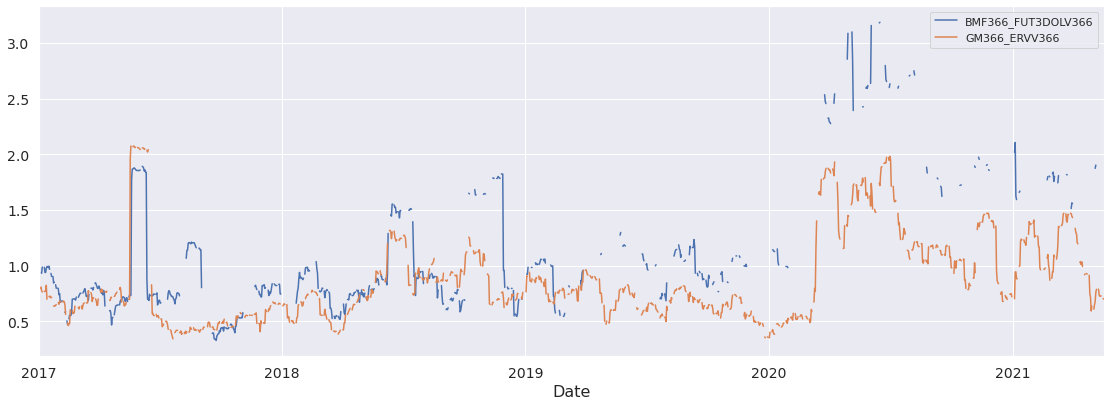

In [43]:
# Volatilidades do Futuro 3 meses Dólar e Dólar Spot
df_eco[['BMF366_FUT3DOLV366', 'GM366_ERVV366']].plot();

## Selecionando séries diárias no Banco Central

- 12461 = IRF-M (ANBIMA Indice Renda Fixa (pré))
- 12462 = IMA-S (Selic)
- 12463 = IMA-C (IGP-M - será descontinuado em 04/2021)
- 12466 = IMA-B (NTN-B, IPCA)
- 12467 = IMA-B 5 (NTN-B < 5 anos)
- 12468 = IMA-B 5+ 
- 12469 = IMA-Geral
- 17626 = IRF - M1 (pré < 1 ano)
- 17627 = IRF - M1+ (pré > 1 ano)
- 17628 = IMA Geral ex C
Fontes: Abecip e BCB-Depec

for i in lista
df_bacen = sgs.time_serie(CDI_CODE, start='02/01/2018', end='31/12/2018')

In [49]:
from datetime import datetime
agora = datetime.now(pytz.timezone('America/Sao_Paulo'))
agora = agora.date()
agora = str(agora)
agora

'2021-05-21'

In [47]:
lista_codigos = [12461, 12462, 12463, 12466, 12467, 12468, 12469, 17626, 17627, 17628]

In [90]:
def importa_bacen(codigo, start_date = '01/01/2017', end_date = '18/05/2021'):
    '''usa o módulo sgs para importar dados do Bacen
    input é o código da série no Bacen''' 
    tt1 = datetime.strptime(start_date, '%d/%m/%Y')#'%Y-%m-%d')
    tt2 = datetime.strptime(end_date, '%d/%m/%Y')
    result = sgs.time_serie(codigo, start= tt1, end= tt2)
    return result

importa_bacen(12462)   ## ---- Não funciona  Error: unsupported locale setting

In [50]:
start_date = '2017-01-01'
end_date = '2021-05-18'

In [51]:
codigo_bc = 17628

In [92]:
def consulta_bc2(codigo_bcb, start_date =  '2017-01-02' , end_date =  '2021-02-12'):
    #start_date = '2017/01/01', end_date = '2021/05/18'):
    #url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
    url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.'+str(codigo_bc)+'/dados?formato=json&dataInicial='+\
    str(start_date)+'&dataFinal='+str(end_date)
    
    df = pd.read_json(url);
    df['data'] = pd.to_datetime(df['data'], dayfirst=False) #dayfirst=True;
    df.set_index('data', inplace=True);
    uu1 = datetime.strptime(start_date, '%Y-%m-%d')
    uu2 = datetime.strptime(end_date, '%Y-%m-%d')
    #df = df.loc[uu1:uu2]
    print(df.head())
    return df

In [66]:
agora

'2021-05-21'

In [79]:
def consulta_bc3(codigo_bc, start_date =  '2017-01-02' , end_date =  '2021-02-12'): 
    import requests
    #url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bc)
    #url = ('http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json&dataInicial={}&dataFinal={}')
    url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.'+str(codigo_bc)+'/dados?formato=json&dataInicial='+\
    str(start_date)+'&dataFinal='+str(end_date)

    request_url = url.format(codigo_bc, start_date, end_date)
    r = requests.get(request_url);
    if r.status_code != 200:
        print('Request para API deu erro')  
    try:
        if r.json() != {}:
            print(r)
            print('')
            print(r.json())
            df = pd.DataFrame.from_dict(r.json())
            
            print(df.info())
            df['data'] = pd.to_datetime(df['data'], dayfirst = False, format = '%Y-%m-%d')#format = '%d/%m%Y') #dayfirst = True
            df.reset_index(drop=True)
            df.set_index('data', inplace = True)
            ##index = pd.date_range(start = '2015-01-01', end = '2020-09-01', freq = "M") 
            df.index = pd.to_datetime(df.index)
            df = df.loc[start_date : end_date]
            
        else:
            df = pd.DataFrame()
            print('')
            print("Resposta Inválida")
            time.sleep(1)
    except ValueError:
            print("Resposta Inválida")
            time.sleep(1)
    
    return df #url, r.json, 
    

In [93]:
consulta_bc2(12461, start_date = '2021-02-01', end_date = '2021-03-31')

                  valor
data                   
2005-03-31  1000.000000
2005-01-04  1000.669206
2005-04-04  1001.317489
2005-05-04  1001.884543
2005-06-04  1002.749507


,valor
data,
2005-03-31,1000.000000
2005-01-04,1000.669206
2005-04-04,1001.317489
2005-05-04,1001.884543
2005-06-04,1002.749507
...,...
2021-04-26,6099.006638
2021-04-27,6096.690796
2021-04-28,6101.681099


In [97]:
consulta_bc3(12461, start_date = '02/01/2021', end_date = '18/05/2021' )   # '2021-02-01', end_date = '2021-03-31')

<Response [200]>

[{'data': '31/12/2020', 'valor': '14439.402355'}, {'data': '04/01/2021', 'valor': '14443.838080'}, {'data': '05/01/2021', 'valor': '14420.075198'}, {'data': '06/01/2021', 'valor': '14385.406370'}, {'data': '07/01/2021', 'valor': '14329.924830'}, {'data': '08/01/2021', 'valor': '14314.816014'}, {'data': '11/01/2021', 'valor': '14264.253505'}, {'data': '12/01/2021', 'valor': '14293.583059'}, {'data': '13/01/2021', 'valor': '14247.732228'}, {'data': '14/01/2021', 'valor': '14277.884754'}, {'data': '15/01/2021', 'valor': '14274.018302'}, {'data': '18/01/2021', 'valor': '14286.715786'}, {'data': '19/01/2021', 'valor': '14282.833493'}, {'data': '20/01/2021', 'valor': '14283.734268'}, {'data': '21/01/2021', 'valor': '14248.771193'}, {'data': '22/01/2021', 'valor': '14219.937140'}, {'data': '25/01/2021', 'valor': '14222.452711'}, {'data': '26/01/2021', 'valor': '14257.029153'}, {'data': '27/01/2021', 'valor': '14266.147798'}, {'data': '28/01/2021', 'valor': '14292.716684'}, {

,data,valor
0,31/12/2020,14439.402355
1,04/01/2021,14443.838080
2,05/01/2021,14420.075198
3,06/01/2021,14385.406370
4,07/01/2021,14329.924830
...,...,...
77,26/04/2021,14163.257726
78,27/04/2021,14150.745876
79,28/04/2021,14161.830531
80,29/04/2021,14169.244128


### A consulta a seguir funciona às vezes - API do Bacen não é 100% confiável para mim

In [101]:
df_bcb = consulta_bc3(12461, start_date = '01/01/2020', end_date = '11/05/2021') #'2021-01-04', '2021-01-31') #[nome_url, conteudo_json ,

<Response [200]>

[{'data': '31/12/2019', 'valor': '13533.391484'}, {'data': '02/01/2020', 'valor': '13545.670599'}, {'data': '03/01/2020', 'valor': '13544.165832'}, {'data': '06/01/2020', 'valor': '13537.095325'}, {'data': '07/01/2020', 'valor': '13547.127241'}, {'data': '08/01/2020', 'valor': '13562.570608'}, {'data': '09/01/2020', 'valor': '13574.876195'}, {'data': '10/01/2020', 'valor': '13574.189949'}, {'data': '13/01/2020', 'valor': '13561.872648'}, {'data': '14/01/2020', 'valor': '13582.405968'}, {'data': '15/01/2020', 'valor': '13604.532109'}, {'data': '16/01/2020', 'valor': '13578.600214'}, {'data': '17/01/2020', 'valor': '13593.334139'}, {'data': '20/01/2020', 'valor': '13593.314007'}, {'data': '21/01/2020', 'valor': '13609.008510'}, {'data': '22/01/2020', 'valor': '13626.027867'}, {'data': '23/01/2020', 'valor': '13622.814730'}, {'data': '24/01/2020', 'valor': '13630.002639'}, {'data': '27/01/2020', 'valor': '13643.161715'}, {'data': '28/01/2020', 'valor': '13652.329996'}, {

In [102]:
df_bcb

,data,valor
0,31/12/2019,13533.391484
1,02/01/2020,13545.670599
2,03/01/2020,13544.165832
3,06/01/2020,13537.095325
4,07/01/2020,13547.127241
...,...,...
328,26/04/2021,14163.257726
329,27/04/2021,14150.745876
330,28/04/2021,14161.830531
331,29/04/2021,14169.244128


In [103]:
lista_codigos

[12461, 12462, 12463, 12466, 12467, 12468, 12469, 17626, 17627, 17628]

In [104]:
url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.'+str(codigo_bc)+'/dados?formato=json&dataInicial='+\
str(start_date)+'&dataFinal='+str(end_date)
print(url)

http://api.bcb.gov.br/dados/serie/bcdata.sgs.17628/dados?formato=json&dataInicial=2017-01-01&dataFinal=2021-05-18


## Usando o Quandl

- 12461 = IRF-M (ANBIMA Indice Renda Fixa (pré))
- 12462 = IMA-S (Selic)
- 12463 = IMA-C (IGP-M - será descontinuado em 04/2021)
- 12466 = IMA-B (NTN-B, IPCA)
- 12467 = IMA-B 5 (NTN-B < 5 anos)
- 12468 = IMA-B 5+ 
- 12469 = IMA-Geral
- 17626 = IRF - M1 (pré < 1 ano)
- 17627 = IRF - M1+ (pré > 1 ano)
- 17628 = IMA Geral ex C
Fontes: Abecip e BCB-Depec

In [105]:
series_bcb = ['IRF-M', 'IMA-S', 'IMA-C', 'IMA-B', 'IMA-B5', 'IMA-B5plus', 'IMA-Geral','IRF-M1', 'IRF-M1plus', 'IMA-Geral_exC']

In [106]:
time_start = time.time()
time_start;

inicio = '2017-01-01'
fim = '2021-05-20'

bcb_out = [quandl.get('BCB/'+str(serie), start_date = inicio, end_date = fim) for serie in lista_codigos] 


df_bcb = pd.concat(bcb_out, axis = 1)
df_bcb.columns = series_bcb

time_end = time.time();
elapsed_time = time_end - time_start;
print('')
print('*********************************************************************')
print('Demorou:',round(elapsed_time,2),' segundos')
print('*********************************************************************')


*********************************************************************
Demorou: 8.03  segundos
*********************************************************************


In [107]:
df_bcb.head(3)

,IRF-M,IMA-S,IMA-C,IMA-B,IMA-B5,IMA-B5plus,IMA-Geral,IRF-M1,IRF-M1plus,IMA-Geral_exC
Date,,,,,,,,,,
2017-01-02,9501.331889,3760.541892,4906.898353,4902.949637,4622.754114,5679.794042,4254.332032,8842.393924,10204.266145,4226.385910
2017-01-03,9504.091195,3762.429860,4918.839196,4893.287993,4627.293595,5659.921372,4253.183605,8846.737017,10206.475503,4224.808119
2017-01-04,9484.045729,3764.353437,4925.708808,4878.090298,4628.690202,5632.314735,4246.846807,8849.799390,10175.721295,4218.045970


In [108]:
df_bcb.tail(3)

,IRF-M,IMA-S,IMA-C,IMA-B,IMA-B5,IMA-B5plus,IMA-Geral,IRF-M1,IRF-M1plus,IMA-Geral_exC
Date,,,,,,,,,,
2021-04-28,14161.830531,4805.879816,0.0,7983.726406,7028.738648,9676.421304,6208.912128,11689.741138,15892.829622,6101.681099
2021-04-29,14169.244128,4806.246416,0.0,7985.768769,7031.292744,9677.990020,6212.491163,11692.197637,15903.791056,6103.367309
2021-04-30,14153.351102,4806.638180,0.0,7951.603647,7024.654499,9608.471001,6203.387523,11692.269991,15876.442255,6093.677449


In [109]:
df_eco.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1599 entries, 2017-01-01 to 2021-05-18
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   YEAR                  1599 non-null   int64  
 1   MONTH                 1599 non-null   int64  
 2   ANBIMA366_TJTLN12366  1350 non-null   float64
 3   ANBIMA366_TJTLN1366   1349 non-null   float64
 4   ANBIMA366_TJTLN3366   1350 non-null   float64
 5   ANBIMA366_TJTLN6366   1350 non-null   float64
 6   BMF366_FUT1DOL366     1329 non-null   float64
 7   BMF366_FUT3DOL366     1054 non-null   float64
 8   BMF366_FUT3DOLV366    799 non-null    float64
 9   EIA366_PBRENT366      1356 non-null   float64
 10  EIA366_PWTI366        1347 non-null   float64
 11  GM366_DOW366          1087 non-null   float64
 12  GM366_ERTUR366        1344 non-null   float64
 13  GM366_ERV366          1096 non-null   float64
 14  GM366_ERVV366         1096 non-null   float64
 15  GM3

In [110]:
df_bcb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1084 entries, 2017-01-02 to 2021-04-30
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IRF-M          1084 non-null   float64
 1   IMA-S          1084 non-null   float64
 2   IMA-C          1084 non-null   float64
 3   IMA-B          1084 non-null   float64
 4   IMA-B5         1084 non-null   float64
 5   IMA-B5plus     1084 non-null   float64
 6   IMA-Geral      1084 non-null   float64
 7   IRF-M1         1084 non-null   float64
 8   IRF-M1plus     1084 non-null   float64
 9   IMA-Geral_exC  1084 non-null   float64
dtypes: float64(10)
memory usage: 93.2 KB


In [111]:
df_all =pd.merge(df_eco,df_bcb, how='outer', left_index=True, right_index=True)

In [112]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1599 entries, 2017-01-01 to 2021-05-18
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   YEAR                  1599 non-null   int64  
 1   MONTH                 1599 non-null   int64  
 2   ANBIMA366_TJTLN12366  1350 non-null   float64
 3   ANBIMA366_TJTLN1366   1349 non-null   float64
 4   ANBIMA366_TJTLN3366   1350 non-null   float64
 5   ANBIMA366_TJTLN6366   1350 non-null   float64
 6   BMF366_FUT1DOL366     1329 non-null   float64
 7   BMF366_FUT3DOL366     1054 non-null   float64
 8   BMF366_FUT3DOLV366    799 non-null    float64
 9   EIA366_PBRENT366      1356 non-null   float64
 10  EIA366_PWTI366        1347 non-null   float64
 11  GM366_DOW366          1087 non-null   float64
 12  GM366_ERTUR366        1344 non-null   float64
 13  GM366_ERV366          1096 non-null   float64
 14  GM366_ERVV366         1096 non-null   float64
 15  GM3

In [113]:
df_all.tail(30)

,YEAR,MONTH,ANBIMA366_TJTLN12366,ANBIMA366_TJTLN1366,ANBIMA366_TJTLN3366,ANBIMA366_TJTLN6366,BMF366_FUT1DOL366,BMF366_FUT3DOL366,BMF366_FUT3DOLV366,EIA366_PBRENT366,...,IRF-M,IMA-S,IMA-C,IMA-B,IMA-B5,IMA-B5plus,IMA-Geral,IRF-M1,IRF-M1plus,IMA-Geral_exC
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-19,2021,4,5.2695,3.2885,3.6240,4.1822,5.573941,NaN,NaN,66.54,...,14117.483133,4804.709495,0.0,7934.288970,6996.284499,9603.227006,6192.298779,11678.505282,15824.765087,6083.787816
2021-04-20,2021,4,5.3697,3.2439,3.6257,4.2321,5.541158,NaN,NaN,65.34,...,14087.465378,4804.903582,0.0,7897.548812,6983.470568,9535.274410,6180.359278,11677.560587,15773.890232,6071.419079
2021-04-21,2021,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-22,2021,4,5.2825,3.2950,3.6468,4.2122,5.489333,NaN,NaN,65.07,...,14136.559172,4805.185695,0.0,7948.028506,7002.882537,9626.472994,6199.673652,11682.239117,15854.835827,6089.793812
2021-04-23,2021,4,5.2785,3.2751,3.6439,4.2185,5.481023,NaN,NaN,65.75,...,14157.141847,4805.183570,0.0,7963.129658,7013.876891,9647.534642,6203.697506,11685.091187,15888.130162,6096.088162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-14,2021,5,5.8755,3.6179,4.0027,4.6566,5.276801,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-15,2021,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-16,2021,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cria indicadores de mês e ano para todas as linhas (mesmo onde havia NaN após o merge)

In [114]:
df_all['MONTH'] = df_all.index.month.astype('int')
df_all['YEAR'] = df_all.index.year.astype('int')

In [115]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1599 entries, 2017-01-01 to 2021-05-18
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   YEAR                  1599 non-null   int64  
 1   MONTH                 1599 non-null   int64  
 2   ANBIMA366_TJTLN12366  1350 non-null   float64
 3   ANBIMA366_TJTLN1366   1349 non-null   float64
 4   ANBIMA366_TJTLN3366   1350 non-null   float64
 5   ANBIMA366_TJTLN6366   1350 non-null   float64
 6   BMF366_FUT1DOL366     1329 non-null   float64
 7   BMF366_FUT3DOL366     1054 non-null   float64
 8   BMF366_FUT3DOLV366    799 non-null    float64
 9   EIA366_PBRENT366      1356 non-null   float64
 10  EIA366_PWTI366        1347 non-null   float64
 11  GM366_DOW366          1087 non-null   float64
 12  GM366_ERTUR366        1344 non-null   float64
 13  GM366_ERV366          1096 non-null   float64
 14  GM366_ERVV366         1096 non-null   float64
 15  GM3

In [117]:
# Define data de hoje (para incluir nos arquivos de saida)
data_hoje = datetime.now(tz = local_tz)
# Converte para string (incluindo hora e minuto - útil se for rodar várias vezes no mesmo dia para testes)
data_hoje = data_hoje.strftime("%Y_%m_%d_%H%M")

In [118]:
time_start = perf_counter()
df_all.to_csv(path_result+'fat_risco_'+str(data_hoje)+'.csv',sep = ';' ,encoding='utf-8')

time_end = perf_counter()
elapsed_time = time_end - time_start
print(' ****salvar df em .csv demorou ', round(elapsed_time,2) , ' segundos *****')

 ****salvar df em .csv demorou  0.16  segundos *****


In [119]:
time_start = perf_counter()
df_all.to_pickle(path_result+'fat_risco_'+str(data_hoje)+'.pkl')

time_end = perf_counter()
elapsed_time = time_end - time_start
print(' ****salvar df em .pkl demorou ', round(elapsed_time,2) , ' segundos *****')

 ****salvar df em .pkl demorou  0.04  segundos *****


In [120]:
path_result

'/home/jovyan/work/@Fund_Eval/@fatores_risco/'